In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 1️. Create Database & Orders Table
conn = sqlite3.connect("online_sales.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS orders (
    order_id INTEGER,
    order_date TEXT,
    amount REAL,
    product_id TEXT
)
""")


In [2]:
# 2️. Insert Dummy Data (Covering Multiple Months)
orders_data = [
    (101, "2025-01-12", 1500, "P01"),
    (102, "2025-01-18", 2000, "P02"),
    (103, "2025-02-03", 2500, "P03"),
    (104, "2025-02-20", 1800, "P01"),
    (105, "2025-03-10", 3000, "P04"),
    (106, "2025-03-15", 1200, "P02"),
    (107, "2025-03-28", 1800, "P01"),
    (108, "2025-04-05", 5000, "P05"),
    (109, "2025-04-12", 4500, "P04"),
]

cursor.executemany("INSERT INTO orders (order_id, order_date, amount, product_id) VALUES (?, ?, ?, ?)", orders_data)

conn.commit()

In [3]:

# 3️. Query Monthly Revenue & Order Volume
query = """
SELECT
    strftime('%Y', order_date) AS order_year,
    strftime('%m', order_date) AS order_month,
    SUM(amount) AS total_revenue,
    COUNT(DISTINCT order_id) AS total_orders
FROM orders
GROUP BY order_year, order_month
ORDER BY order_year, order_month;
"""

df = pd.read_sql_query(query, conn)
conn.close()

In [4]:
# 4️. Display Results in Console
print("📊 Monthly Sales Trend:\n")
print(df)

📊 Monthly Sales Trend:

  order_year order_month  total_revenue  total_orders
0       2025          01         3500.0             2
1       2025          02         4300.0             2
2       2025          03         6000.0             3
3       2025          04         9500.0             2


In [5]:
# 5️. Prepare Column for Plotting (Year-Month Format)
df["year_month"] = df["order_year"] + "-" + df["order_month"]

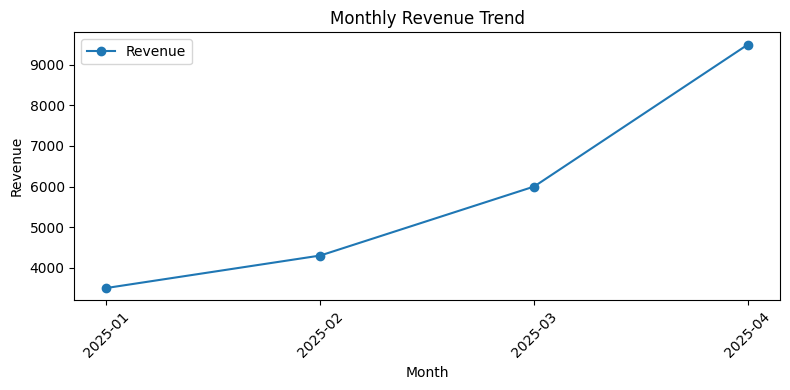

In [6]:
# 6️. Plot Revenue Trend
plt.figure(figsize=(8, 4))
plt.plot(df["year_month"], df["total_revenue"], marker="o", label="Revenue")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

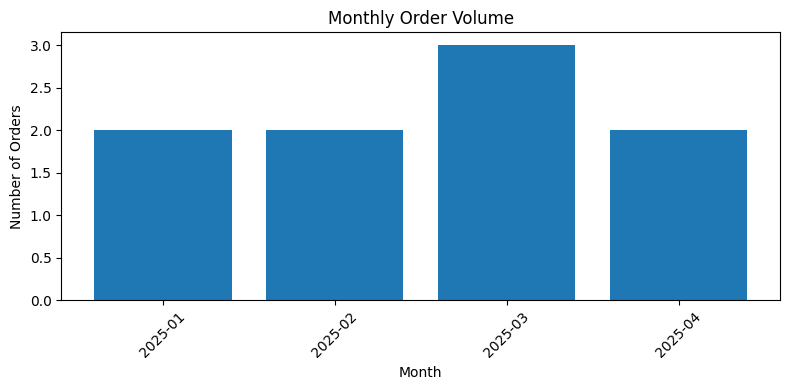

In [7]:
# 7️. Plot Order Volume Trend
plt.figure(figsize=(8, 4))
plt.bar(df["year_month"], df["total_orders"], label="Orders")
plt.title("Monthly Order Volume")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()